<a href="https://colab.research.google.com/github/DanielleRomanoff/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

In [181]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
df['age'] = 2019 - df.year
print(df.shape)
df.head()

(8495, 10)


,make,price,body,mileage,engV,engType,registration,year,drive,age
0,23,15500.0,0,68,2.5,1,1,2010,1,9
1,50,20500.0,3,173,1.8,1,1,2011,2,8
2,50,35000.0,2,135,5.5,3,1,2008,2,11
3,50,17800.0,5,162,1.8,0,1,2012,0,7
4,55,16600.0,0,83,2.0,3,1,2013,1,6


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [182]:
y = df['price']
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'drive', 'age']]
# Our data needs to have this shape to be accepted by sklearn
print(X.shape)
print(y.shape)
X.head()

(8495, 8)
(8495,)


,make,body,mileage,engV,engType,registration,drive,age
0,23,0,68,2.5,1,1,1,9
1,50,3,173,1.8,1,1,2,8
2,50,2,135,5.5,3,1,2,11
3,50,5,162,1.8,0,1,0,7
4,55,0,83,2.0,3,1,1,6


## 1.2 Split the data into test and train datasets using train_test_split

In [183]:
# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train.head()

(8495, 8) 

(4247, 8)
(4248, 8)
(4247,)
(4248,)


,make,body,mileage,engV,engType,registration,drive,age
166,42,2,155,3.6,0,1,1,11
6044,76,3,999,1.3,3,1,2,35
1006,77,5,1,2.2,0,1,0,6
6129,67,3,0,1.2,3,1,0,3
5920,34,0,49,3.5,3,1,1,10


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [184]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [185]:
print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  7886.89079148 -1098.2829573 ]

 Intercept:  32842.27923638858


## 1.5 Use the test data to make predictions

In [186]:
# Slit into test and train datasets
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X1_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X1_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 23969.863358092756
R^2 is 0.16867307432917555
coefficients:  -42.098555218977666
intercepts:  34622.19874787583


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [187]:
MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 967373230.0376031
RMSE is 31102.62416642048
R^2 is -0.399699461217802


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

I didn't use the year. Instead, I made a column 'age' that used the year to give me the age of the vehicle.

## 1.8 How should we interpret the Root-Mean-Square Error?

The RSME is a variance.  It measures the average magnitute of the errors but is disinterested in the direction of the error. This is a measure of accuracy. It is the difference between the actual and the predicted values, each then squared, then averaged over the entire sample.

## 1.9 How should we interpret the $R^2$?

The $R^2$ tells us how successful or not the fit is in explaining the variance of the data. It's the square of the correlation between the actual value and the predicted value. $R^2$ can lie anywhere between zero and 1. An $R^2$ closer to 1 tells us there is a greater proportion of variance. Here we get an $R^2$ equal to 0.2734264423377091 or about 27.34%. This means the fit explains 27.34% of the total variation in the data around the average.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [188]:
## generate our ln(price) variable
df['ln_price'] = np.log(df['price'])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

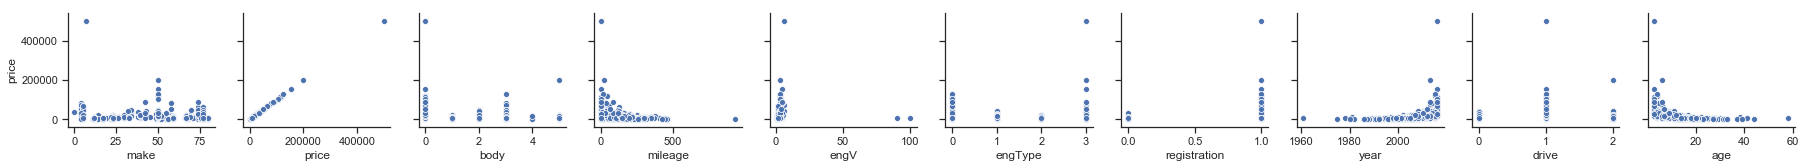

In [189]:
sns.set(style = "ticks", color_codes = True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('ln_price')

# Sample our dataframe to take 1/20th the values
sampled = df.sample(frac = 0.05, replace = True)
# print(x_columns)

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data = sampled, y_vars = ['price'], x_vars = x_columns)

## 2.3 If appropriate, create any polynomial features. 

In [190]:
X1 = df[['mileage', 'age']]

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [191]:
# Separate dependent and independent variables
y = df.loc[:, ['ln_price']].values
X1 = df.loc[:, ['mileage', 'age']].values

# Slit into test and train datasets
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X1_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X1_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.695607561656902
R^2 is 0.48604060820318506
coefficients:  [-0.00059336 -0.0915822 ]
intercepts:  [10.40434135]


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

Again, I used an age column rather than a year as I changed it right away so the information would be more useful. That said, the coefficient is reduced drastically when the features are reduced to just the two, and instead of the price, we use the ln(price). The ln(price) reduces the skew in the y variable. It gives us better prediction when we normalize our data.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

It minimizes a function iteratively to find the local minimum. The gradient itself measures how much the output of a function changes every time you change the input slightly.

## 3.2 What is the "Learning Rate" and what is its function?

The Learning Rate is the size of the steps we take toward the negative gradient. We can have a big learning rate to cover more ground but we risk overshooting the lowest point. A small learning rate gives us more precsion but can be very slow. We can be more confident in getting the lowest point but it will take a long time.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [192]:
y = df['price']
X2 = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'drive', 'age']]

model = sm.OLS(y, X2).fit(cov_type = 'HC3')
predictions = model.predict(X2) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     1204.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:01:37   Log-Likelihood:                -96815.
No. Observations:                8495   AIC:                         1.936e+05
Df Residuals:                    8487   BIC:                         1.937e+05
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
make            40.3061      8.997      4.480   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X2.columns, '\n\n')

vif = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif)

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'drive',
       'age'],
      dtype='object') 


[4.448236773541283, 3.2994254497836253, 4.562103502022187, 1.232732273170215, 2.7480695099633303, 7.958331969016734, 1.7271760199522663, 5.998767738621664]


We do not have any over 10 but a couple are a little high. I would check those two. 